In [3]:
from PIL import Image
from itertools import product
import os
import random 
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
dir = "C:/Users/nicol/OneDrive/Documents/GitHub/Image-Analysis/iapr/data/data_project/tiles/solution_00_02"
tiles = []
tiles_noCanny = []
for image in os.listdir(dir):
        im = cv2.imread(os.path.join(dir, image))
        tiles.append(cv2.Canny(im,10,245))
        tiles_noCanny.append(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))


In [6]:
print(np.shape(tiles_noCanny[0]))

(128, 128, 3)


In [18]:
edges = np.zeros((len(tiles), 4, 128))


for i in range(len(tiles)):
    image = tiles[i]
    imageArray = image
    edges[i,0,:] = imageArray[0,:]
    edges[i,1,:] = imageArray[127,:]
    edges[i,2,:] = imageArray[:,0]
    edges[i,3,:] = imageArray[:,127]

edges = edges/255

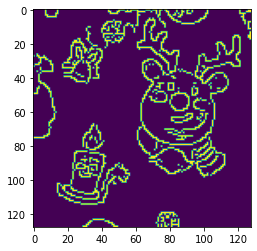

In [19]:
plt.imshow(tiles[0])

In [20]:
minL1s = np.zeros((len(tiles),4)) 
minTiles = np.zeros((len(tiles),4))
minEdges = np.zeros((len(tiles),4))


for i in range(len(tiles)):
    js = list(range(len(tiles)))
    js.remove(i)
    for a in range(4):
        minL1 = np.inf
        edge = edges[i,a,:]
        for j in js:
            for b in range(4):
                L1 = np.sum(np.abs(edges[j,b,:]-edge))
                if L1 < minL1:
                    minL1 = L1
                    minEdgeL1 = b
                    minTileL1 = j
        minL1s[i, a] = minL1
        minTiles[i, a] = minTileL1
        minEdges[i, a] = minEdgeL1
                


In [21]:
print(minEdges)
print(minTiles)
print(minL1s)

[[2. 1. 1. 0.]
 [0. 0. 2. 3.]
 [1. 1. 0. 1.]
 [2. 1. 2. 2.]
 [0. 0. 1. 1.]
 [1. 2. 1. 0.]
 [1. 1. 1. 3.]
 [1. 1. 1. 1.]
 [1. 0. 2. 1.]]
[[7. 5. 5. 4.]
 [3. 4. 4. 0.]
 [5. 5. 3. 3.]
 [4. 5. 0. 0.]
 [3. 3. 5. 5.]
 [8. 4. 2. 7.]
 [5. 5. 2. 0.]
 [3. 3. 8. 5.]
 [5. 3. 0. 5.]]
[[24. 15.  7. 11.]
 [20. 11.  9. 13.]
 [16.  7.  9. 40.]
 [ 7.  7. 17. 18.]
 [ 8. 10.  6. 12.]
 [17.  6. 21.  8.]
 [16. 16.  9. 21.]
 [ 7. 16. 18. 10.]
 [11. 10. 12. 12.]]


In [22]:
print(np.sum(minL1s,axis=1))
summed = np.sum(minL1s,axis=1)

[57. 53. 72. 49. 36. 52. 62. 51. 45.]


In [23]:
center = np.argmin(summed)
print(center)
print(minTiles[center,:])
print(minEdges[center,:])

4
[3. 3. 5. 5.]
[0. 0. 1. 1.]


In [24]:
def match_edge(index, tile, im1, im2):

    ### TOP EDGE
    if index == 0:
        if minEdges[tile,index] == 2:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_COUNTERCLOCKWISE)
        if minEdges[tile,index]  == 3:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_CLOCKWISE)
        if minEdges[tile,index]  == 0:
            im2 = cv2.rotate(im2,cv2.ROTATE_180)

        solved = cv2.vconcat([im2, im1])
    
    ### BOTTOM EDGE
    elif index == 1:
        if minEdges[tile,index] == 1:
            im2 = cv2.rotate(im2,cv2.ROTATE_180)
        if minEdges[tile,index]  == 2:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_CLOCKWISE)
        if minEdges[tile,index]  == 3:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_COUNTERCLOCKWISE)

        solved = cv2.vconcat([im1, im2])
    
    ### LEFT EDGE
    elif index == 2:
        if minEdges[tile,index] == 0:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_CLOCKWISE)
        if minEdges[tile,index] == 1:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_COUNTERCLOCKWISE)
        if minEdges[tile,index] == 2:
            im2 = cv2.rotate( im2,cv2.ROTATE_180)

        solved = cv2.hconcat([im2, im1])

    ### RIGHT EDGE
    elif index == 3:
        if minEdges[tile,index] == 0:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_COUNTERCLOCKWISE)
        if minEdges[tile,index] == 1:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_CLOCKWISE)
        if minEdges[tile,index] == 3:
            im2 = cv2.rotate( im2,cv2.ROTATE_180)

        solved = cv2.hconcat([im1, im2])

    return solved

In [25]:
# middle row
minTiles = minTiles.astype(int)
minEdges = minEdges.astype(int)


im1 = tiles_noCanny[center]
im2 = tiles_noCanny[minTiles[center,2]] #left
solved = match_edge(2, center, im1, im2)

im1 = solved
im2 = tiles_noCanny[minTiles[center,3]] #right
middle = match_edge(3, center, im1, im2)

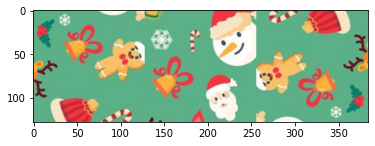

In [26]:
plt.imshow(middle)

In [27]:
# top row

tile_idx = minTiles[center,0]
im1 = tiles_noCanny[tile_idx]
im2 = tiles_noCanny[minTiles[tile_idx,2]] #left
solved = match_edge(2, tile_idx, im1, im2)

im1 = solved
im2 = tiles_noCanny[minTiles[tile_idx,3]] #right
top = match_edge(3, tile_idx, im1, im2)



# bottom row
tile_idx = minTiles[center,1]
im1 = tiles_noCanny[tile_idx]
im2 = tiles_noCanny[minTiles[tile_idx,2]] #left
solved = match_edge(2, tile_idx, im1, im2)

im1 = solved
im2 = tiles_noCanny[minTiles[tile_idx,3]] #right
bottom = match_edge(3, tile_idx, im1, im2)

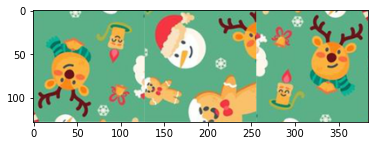

In [28]:
plt.imshow(top)

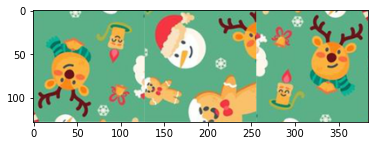

In [29]:
plt.imshow(bottom)

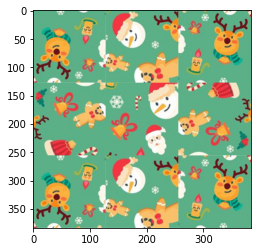

In [30]:
full = cv2.vconcat([top, middle, bottom])
plt.imshow(full)

In [16]:
print(int(minTiles[1]))
print(minEdges[1])

im1 = tiles[int(minTiles[1])]
im2 = (tiles[int(minTiles[13])])

### BOTTOM EDGE
if minEdges[13] == 1:
    im2 = cv2.rotate(im2,cv2.ROTATE_180)
if minEdges[13]  == 2:
    im2 = cv2.rotate(im2,cv2.ROTATE_90_CLOCKWISE)
if minEdges[13]  == 3:
    im2 = cv2.rotate(im2,cv2.ROTATE_90_COUNTERCLOCKWISE)

solved = cv2.vconcat([im1, im2])
plt.imshow(solved)

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
def concat_3_row(im1, im2, im3):
    dst = Image.new('RGB', (im1.width*3, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    dst.paste(im3, (im1.width*2, 0))
    return dst

def concat_4_row(im1, im2, im3, im4):
    dst = Image.new('RGB', (im1.width*4, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    dst.paste(im3, (im1.width*2, 0))
    dst.paste(im4, (im1.width*3, 0))
    return dst

def concat_3_col(im1, im2, im3):
    dst = Image.new('RGB', (im1.width, im1.height*3))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    dst.paste(im3, (0, im1.height*2))
    return dst

def concat_4_col(im1, im2, im3, im4):
    dst = Image.new('RGB', (im1.width, im1.height*4))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    dst.paste(im3, (0, im1.height*2))
    dst.paste(im4, (0, im1.height*3))
    return dst

In [ ]:
for image in os.listdir(dir):
    im = Image.open(os.path.join(dir, image))
    tiles.append(im)


if len(os.listdir(dir)) == 9:
    i = [0,1,2,3,4,5,6,7,8]
    row1 = concat_3_row(tiles[i[0]], tiles[i[1]], tiles[i[2]])
    row2 = concat_3_row(tiles[i[3]], tiles[i[4]], tiles[i[5]])
    row3 = concat_3_row(tiles[i[6]], tiles[i[7]], tiles[i[8]])
    new = concat_3_col(row1, row2, row3)
    name = "shuffled" + folder + ".png"
    new.save(os.path.join("C:/Users/nicol/OneDrive/Documents/GitHub/Image-Analysis/iapr/data/data_project/shuffled/", name))
if len(os.listdir(dir)) == 12:
    i = [0,1,2,3,4,5,6,7,8,9,10,11]
    row1 = concat_3_row(tiles[i[0]], tiles[i[1]], tiles[i[2]])
    row2 = concat_3_row(tiles[i[3]], tiles[i[4]], tiles[i[5]])
    row3 = concat_3_row(tiles[i[6]], tiles[i[7]], tiles[i[8]])
    row4 = concat_3_row(tiles[i[9]], tiles[i[10]], tiles[i[11]])
    new = concat_4_col(row1, row2, row3, row4)
    name = "shuffled" + folder + ".png"
    new.save(os.path.join("C:/Users/nicol/OneDrive/Documents/GitHub/Image-Analysis/iapr/data/data_project/shuffled/", name))
if len(os.listdir(dir)) == 16:
    i = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    row1 = concat_4_row(tiles[i[0]], tiles[i[1]], tiles[i[2]], tiles[i[12]])
    row2 = concat_4_row(tiles[i[3]], tiles[i[4]], tiles[i[5]], tiles[i[13]])
    row3 = concat_4_row(tiles[i[6]], tiles[i[7]], tiles[i[8]], tiles[i[14]])
    row4 = concat_4_row(tiles[i[9]], tiles[i[10]], tiles[i[11]], tiles[i[15]])
    new = concat_4_col(row1, row2, row3, row4)
    name = "shuffled" + folder + ".png"
    new.save(os.path.join("C:/Users/nicol/OneDrive/Documents/GitHub/Image-Analysis/iapr/data/data_project/shuffled/", name))


In [ ]:
# remove highest 12 values as the borders
borders = 12
for i in range(borders):
    ind = np.argmax(minL1s)
    minL1s = np.delete(minL1s, ind)
    minTiles = np.delete(minTiles, ind)
    minEdges = np.delete(minEdges, ind)
    tilePaths.pop(ind)